importing Jupyter notebook from rutgers_socreward.ipynb


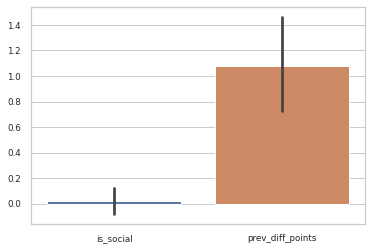

In [1]:
import pandas as pd
import numpy
import itertools
from utility import *
import import_ipynb
from rutgers_socreward import Subject, subject_list

In [2]:
#list of columns for making BIDS tsv file 
subset = ['deckchoice',
          'choice_onset',
          "press1_onset",
          "info_onset",
          "partner_onset",
          "press2_onset",
          'is_social', 
          'aff_feedback_prev_social', 
          'aff_feedback_prev_nonsocial',
          "aff_onset",
          "duration",
          'prev_diff_points',
          "RT1",
          "RT2", 
          'aff_feedback_curr',
          "lapse1",
          "lapse2",
          "is_catch"
]

#### Onset Type, Description : Duration

- choice_onset, Choose star or pentagon: RT1 or 3s 
- info_onset, Reveal choice value: 1.5s 
- partner-onset, Reveal Partner Choice: RT2 or 3s
- aff_onset,  Affective feedback win or lose: 1.5s

In [3]:
def generate_ev(sub, write = False):
    nan = 'n/a'
    for i in Subject(sub).matfiles:
        sub = sub
        run = Subject(sub).matfiles.index(i) + 1
        trial_dfs = []
        df = convert_mat(i)



        for index, row in df.iterrows():
            trial_df = pd.DataFrame()
            onset = []
            duration = []
            trial_type = []
            RT1 = []
            RT2 = []
            points = []


            if row.partner == 1:
                is_social = 'social'
            else:
                is_social = 'non_social'

            if row.deckchoice == 1:
                choice = 'star'
            elif row.deckchoice == 2:
                choice = 'pentagon'
            else:
                choice = 'na'

            if row.lapse1 == 1 or row.lapse2 == 1:
                lapse = '_lapse'
                dur_choice = dur_partner = 3
            else:
                lapse = ''
                dur_choice = row.RT1 
                dur_partner = row.RT2


            if row.is_catch == 1:
                catch = '_catch'
                row.choice_onset = 'n/a'
                dur_choice = 'n/a'
            else:
                catch = ''


            #choice
            onset.append(row.choice_onset)
            duration.append(dur_choice)
            trial_type.append(f'partner-{is_social}_choice-{choice}{lapse}{catch}')
            RT1.append(row.RT1)
            RT2.append('n/a')
            points.append('n/a')

            
            #info
            onset.append(row.info_onset)
            duration.append(1.5)
            trial_type.append(f'partner-{is_social}_feedback-informative{lapse}{catch}')
            RT1.append('n/a')
            RT2.append('n/a')
            points.append(row.Npoints)


            #partner
            onset.append(row.partner_onset)
            duration.append(dur_partner)
            trial_type.append(f'partner-{is_social}_feedback-partner{lapse}{catch}')
            RT1.append('n/a')
            RT2.append(row.RT2)
            points.append('n/a')


            #aff
            onset.append(row.aff_onset)
            duration.append(1.5)
            trial_type.append(f'partner-{is_social}_feedback-affective{lapse}{catch}')
            RT1.append('n/a')
            RT2.append('n/a')
            points.append('n/a')


            trial_df['onset'] = onset
            trial_df['duration'] = duration
            trial_df['trial_type'] = trial_type
            trial_df['choice_RT'] = RT1
            trial_df['partner_RT'] = RT2
            trial_df['points'] = points


            trial_dfs.append(trial_df)

        bids_tsv = pd.concat(trial_dfs).reset_index()
        file_name = f'EVfiles/sub-{sub}_task-socreward_run-{run}_events.tsv'
        bids_tsv.to_csv(file_name, index = False)

    

In [4]:
for sub in subject_list:
    generate_ev(sub)

In [5]:
#fix index column

dfs = glob.glob('EVfiles/*.tsv')

for i in dfs:
    df = pd.read_csv(i, index_col=False)
    df['trialn'] = range(1, len(df) + 1)
    df = df.iloc[:, 1:]
    print(df)
    #df.to_csv(i, sep ='\t', index = False)
    
    
    
    

          onset  duration                                   trial_type  \
0           NaN       NaN             partner-social_choice-star_catch   
1      9.784389  1.500000    partner-social_feedback-informative_catch   
2      0.000000  0.000000        partner-social_feedback-partner_catch   
3      0.000000  1.500000      partner-social_feedback-affective_catch   
4     22.332338  0.479372               partner-non_social_choice-star   
..          ...       ...                                          ...   
155    0.000000  1.500000  partner-non_social_feedback-affective_lapse   
156  765.858623  3.000000               partner-social_choice-na_lapse   
157    0.000000  1.500000    partner-social_feedback-informative_lapse   
158    0.000000  3.000000        partner-social_feedback-partner_lapse   
159    0.000000  1.500000      partner-social_feedback-affective_lapse   

     choice_RT  partner_RT  points  trialn  
0     1.285837         NaN     NaN       1  
1          NaN       

          onset  duration                                     trial_type  \
0           NaN       NaN           partner-non_social_choice-star_catch   
1      8.786055  1.500000  partner-non_social_feedback-informative_catch   
2      0.000000  0.000000      partner-non_social_feedback-partner_catch   
3      0.000000  1.500000    partner-non_social_feedback-affective_catch   
4     22.049191  0.902052                 partner-non_social_choice-star   
..          ...       ...                                            ...   
155  748.050800  1.500000              partner-social_feedback-affective   
156  753.567357  0.339385                 partner-non_social_choice-star   
157  760.550436  1.500000        partner-non_social_feedback-informative   
158  764.050353  1.134285            partner-non_social_feedback-partner   
159  772.066958  1.500000          partner-non_social_feedback-affective   

     choice_RT  partner_RT  points  trialn  
0     0.749198         NaN     NaN       1

          onset  duration                               trial_type  choice_RT  \
0      4.782667  0.578454           partner-non_social_choice-star   0.578454   
1      8.765539  1.500000  partner-non_social_feedback-informative        NaN   
2     12.265394  1.132732      partner-non_social_feedback-partner        NaN   
3     17.282517  1.500000    partner-non_social_feedback-affective        NaN   
4     22.782151  0.574592           partner-social_choice-pentagon   0.574592   
..          ...       ...                                      ...        ...   
155  751.558798  1.500000        partner-social_feedback-affective        NaN   
156  756.308742  0.000836           partner-social_choice-pentagon   0.000836   
157  760.291496  1.500000      partner-social_feedback-informative        NaN   
158  764.791425  0.751379          partner-social_feedback-partner        NaN   
159  769.808147  1.500000        partner-social_feedback-affective        NaN   

     partner_RT  points  tr

          onset  duration                                     trial_type  \
0           NaN       NaN           partner-non_social_choice-star_catch   
1      8.802475  1.500000  partner-non_social_feedback-informative_catch   
2      0.000000  0.000000      partner-non_social_feedback-partner_catch   
3      0.000000  1.500000    partner-non_social_feedback-affective_catch   
4     19.550042  1.134845                     partner-social_choice-star   
..          ...       ...                                            ...   
155  758.067623  1.500000              partner-social_feedback-affective   
156  762.083918  0.713782                     partner-social_choice-star   
157  769.066571  1.500000            partner-social_feedback-informative   
158  773.566079  1.060464                partner-social_feedback-partner   
159  778.566598  1.500000              partner-social_feedback-affective   

     choice_RT  partner_RT  points  trialn  
0     0.567969         NaN     NaN       1